# 2.7 动量(反转)策略
策略建立在以下假设:

动量策略:如果某只股票在前一段时期表现较好，则下一段时期仍有较好表现。

反转策略: 如果某只股票在前一段时期表现不好，则下一段时期将会反转，表现变好。

In [ ]:
def initialize(context):
    set_option('use_real_price', True)
    set_order_cost(OrderCost(open_tax=0, close_tax=0.001, \
    open_commission=0.0003,close_commission=0.0003, \
    close_today_commission=0, min_commission=5),type='stock')
    
    g.benchmark = '000300.XSHG'
    g.N = 20
    set_benchmark(g.benchmark)
    run_monthly(handle,1)
    
def handle(context):
    stocks = get_index_stocks('000300.XSHG')
    # history 这些股票中的30天的收盘价
    df_close = history(30,field = 'close', security_list = list(stocks)).T
    # 计算收益率ret
    df_close['ret'] = (df_close.iloc[:,-1] - df_close.iloc[:,0])/df_close.iloc[:,0]
    # 选出收益率最好的n只股票，这里用的是动量策略
    # 要是想实现反转策略，则ascending=True即可
    sorted_stocks = df_close.sort_values('ret', ascending = False).index
   
    to_hold = sorted_stocks[:g.N]
    
    for stock in context.portfolio.positions:
        if stock not in to_hold:
            order_target(stock,0)
    
    to_buy = [stock for stock in to_hold if stock not in context.portfolio.positions]
    
    if len(to_buy)>0:
        cash_per_stock = context.portfolio.available_cash / len(to_buy)
        for stock in to_buy:
            order_value(stock, cash_per_stock)
  

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

import numpy as np
import pandas as pd
data = pd.read_csv('/data/量化交易策略回测结果/2.7动量(反转)策略.csv',encoding = 'ansi')
data.head()

,时间,基准收益,策略收益,当日盈利,当日亏损,当日买入,当日卖出,超额收益(%)
0,2019-01-02 16:00:00,-1.37,-0.93,0.0,-933.0,64301,0.0,0.45
1,2019-01-03 16:00:00,-1.52,-1.64,0.0,-711.0,0,0.0,-0.12
2,2019-01-04 16:00:00,0.84,-0.95,695.0,0.0,0,0.0,-1.78
3,2019-01-07 16:00:00,1.45,-0.06,886.0,0.0,0,0.0,-1.49
4,2019-01-08 16:00:00,1.23,-0.41,0.0,-351.0,0,0.0,-1.62


In [2]:
data.tail()

,时间,基准收益,策略收益,当日盈利,当日亏损,当日买入,当日卖出,超额收益(%)
482,2020-12-25 16:00:00,67.47,43.77,4478.0,0.0,0,0.0,-14.15
483,2020-12-28 16:00:00,68.22,45.60,1833.0,0.0,0,0.0,-13.45
484,2020-12-29 16:00:00,67.50,40.30,0.0,-5303.0,0,0.0,-16.24
485,2020-12-30 16:00:00,69.85,42.65,2352.0,0.0,0,0.0,-16.01
486,2020-12-31 16:00:00,73.10,44.74,2094.0,0.0,0,0.0,-16.38


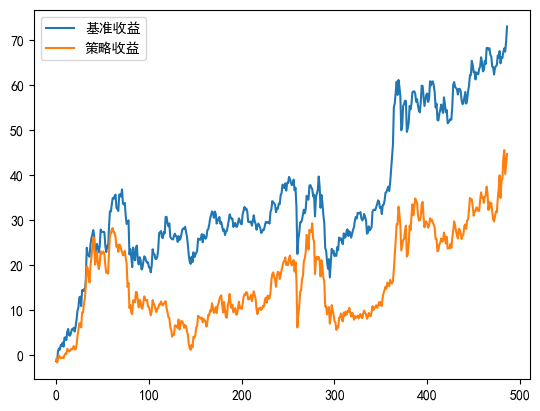

In [3]:
data[['基准收益', '策略收益']].plot()
plt.show()